In [2]:
from utils import path_setup
path_setup()
from src.paths import PROCESSED_DATA
from src.processing.plots import plot
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
data_path = os.path.join(PROCESSED_DATA,"cleaned_data.xlsx")

df = pd.read_excel(data_path, index_col=0)
df

np.int64(31)

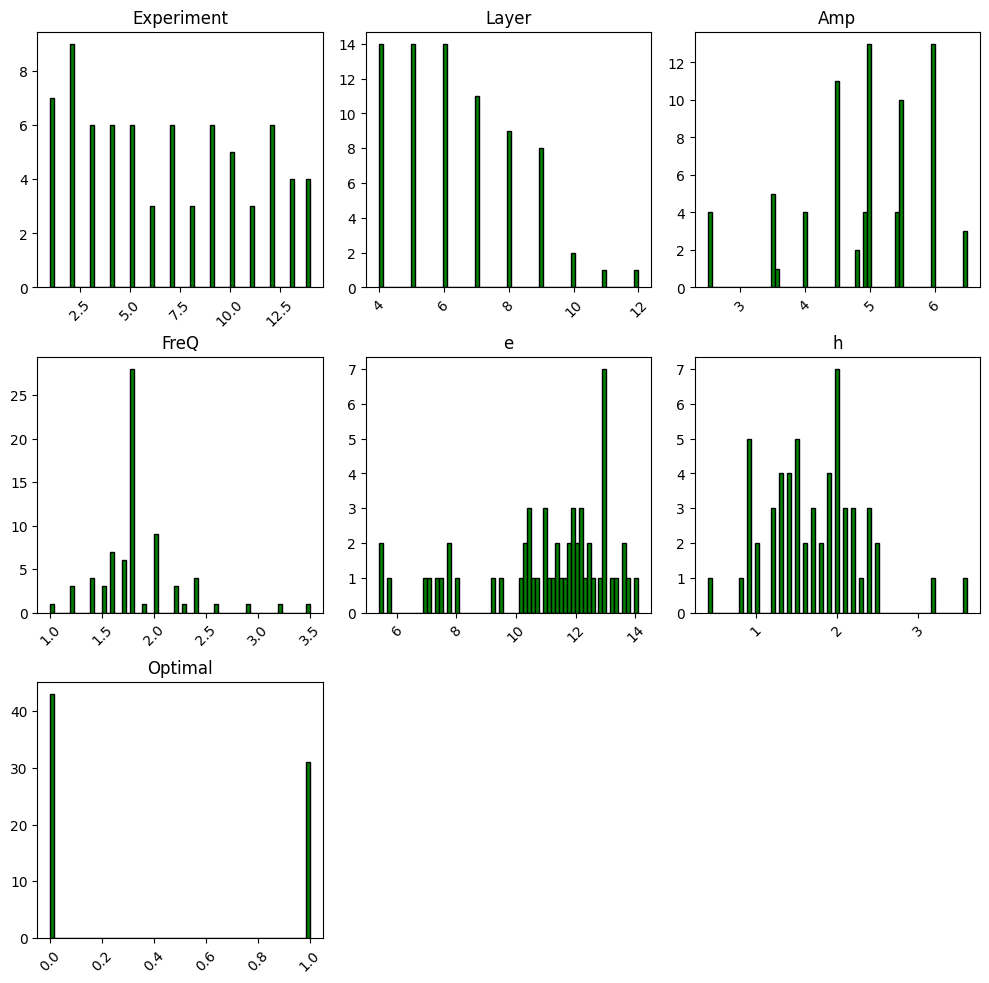

In [3]:
plot(df,hist=True)

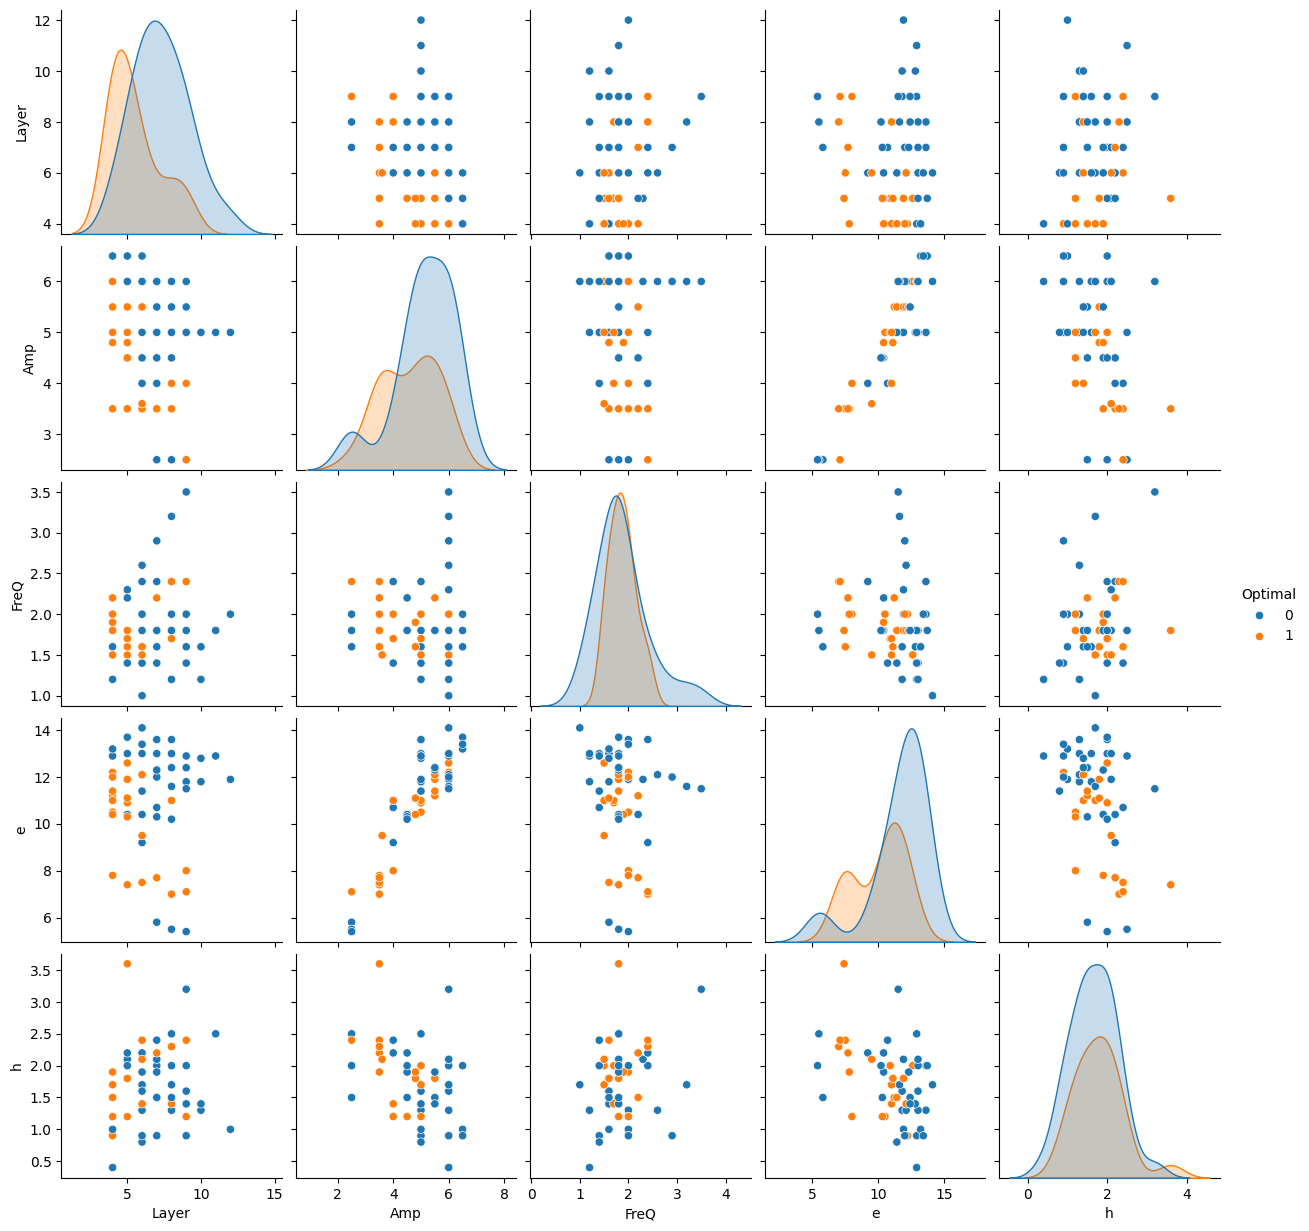

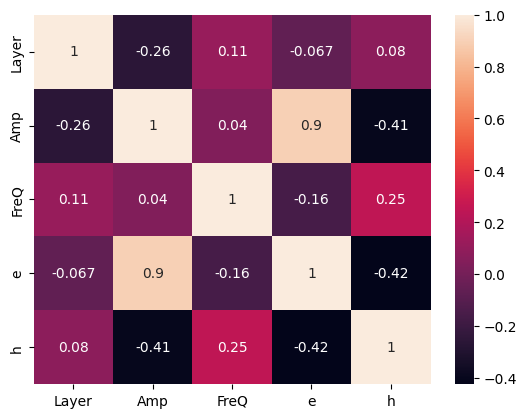

<Figure size 640x480 with 0 Axes>

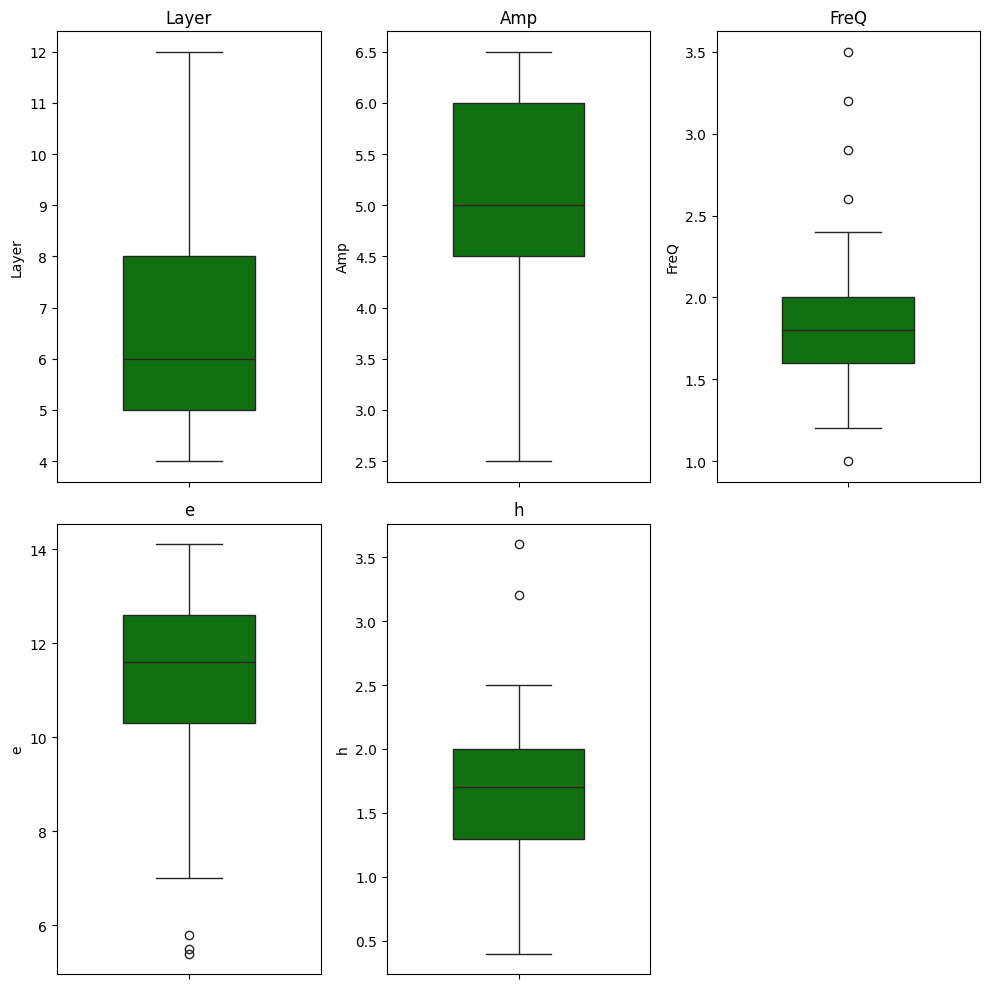

           Layer        Amp       FreQ          e          h
count  57.000000  57.000000  57.000000  57.000000  57.000000
mean    6.596491   4.915789   1.875439  10.994737   1.707018
std     2.007661   1.074342   0.459923   2.210157   0.592471
min     4.000000   2.500000   1.000000   5.400000   0.400000
25%     5.000000   4.500000   1.600000  10.300000   1.300000
50%     6.000000   5.000000   1.800000  11.600000   1.700000
75%     8.000000   6.000000   2.000000  12.600000   2.000000
max    12.000000   6.500000   3.500000  14.100000   3.600000


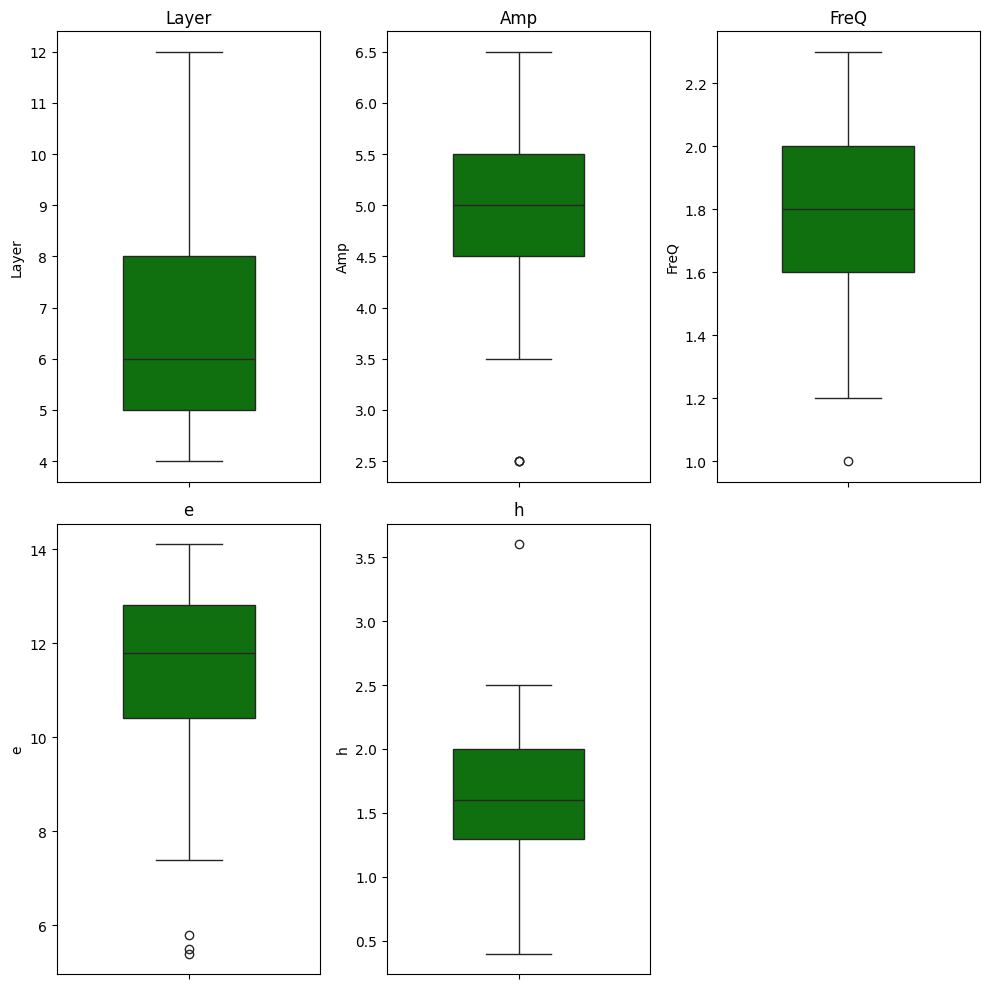

           Layer        Amp       FreQ          e          h
count  49.000000  49.000000  49.000000  49.000000  49.000000
mean    6.448980   4.922449   1.736735  11.073469   1.659184
std     2.082279   1.033252   0.282617   2.185442   0.565287
min     4.000000   2.500000   1.000000   5.400000   0.400000
25%     5.000000   4.500000   1.600000  10.400000   1.300000
50%     6.000000   5.000000   1.800000  11.800000   1.600000
75%     8.000000   5.500000   2.000000  12.800000   2.000000
max    12.000000   6.500000   2.300000  14.100000   3.600000


In [7]:
from src.processing.percentile import cut_percentile
df_copy=df.copy()
df_copy = df_copy.drop(columns=["Experiment"])
df_copy.dropna(axis=0, inplace=True)

sns.pairplot(df_copy, hue="Optimal")
plt.figure()

df_copy = df_copy.drop(columns=["Optimal"])

corr_matrix=df_copy.corr(method="pearson")
sns.heatmap(corr_matrix, annot=True)
plt.figure()


plot(df_copy, box=True)
print(df_copy.describe())

df_copy = cut_percentile(df_copy, "FreQ",90)    
plot(df_copy,box=True)
print(df_copy.describe())


In [22]:
#Обрабатываем и выгружаем приготовленные данные для модели
df = pd.read_excel(data_path, index_col=0)
df=df.drop(columns="Experiment", errors="ignore")
df = cut_percentile(df,"FreQ",perc=90)
print(df.describe())
df.to_csv(os.path.join(PROCESSED_DATA,"prepaired_data.csv"))

           Layer        Amp       FreQ          e          h    Optimal
count  66.000000  66.000000  66.000000  49.000000  49.000000  66.000000
mean    6.272727   4.937879   1.746970  11.073469   1.659184   0.439394
std     1.957592   0.913281   0.244458   2.185442   0.565287   0.500117
min     4.000000   2.500000   1.000000   5.400000   0.400000   0.000000
25%     5.000000   4.500000   1.600000  10.400000   1.300000   0.000000
50%     6.000000   5.000000   1.800000  11.800000   1.600000   0.000000
75%     7.750000   5.500000   1.800000  12.800000   2.000000   1.000000
max    12.000000   6.500000   2.300000  14.100000   3.600000   1.000000


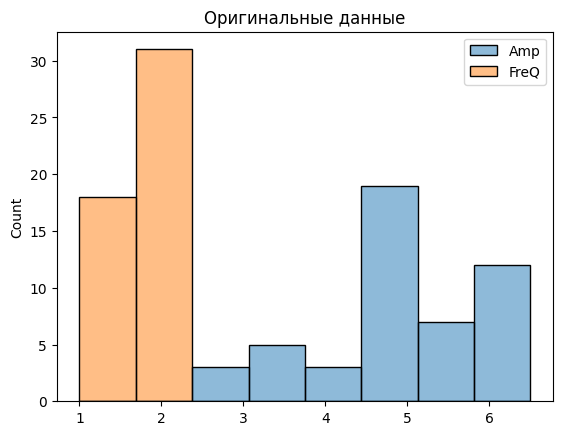

Text(0.5, 1.0, 'Масштабированные данные')

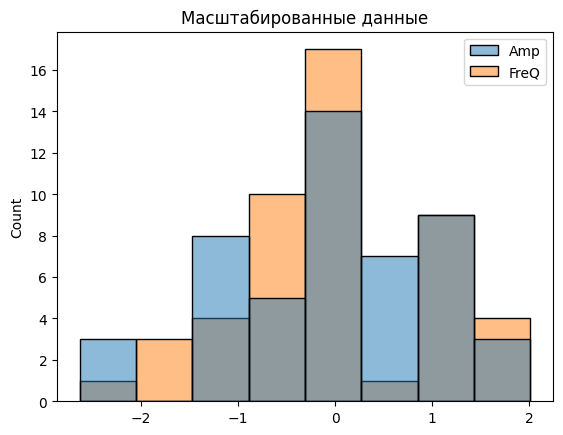

In [23]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler

X= df_copy[["Amp","FreQ"]]

scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
sns.histplot(df_copy[["Amp","FreQ"]])
plt.title("Оригинальные данные")
plt.show()
sns.histplot(X_scaled)
plt.title("Масштабированные данные")